In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler



In [54]:
data = pd.read_csv('/content/f1_data (1).csv')

data


,Ground Clearance (mm),Suspension Travel Rear (mm),Suspension Travel Front (mm),Chassis Stiffness (N/m),Angle of Attack (degrees),Drag Coefficient,Tire Grip Coefficient
0,48.932035,150.133090,129.739731,7499.747560,3.827756,0.715468,2729.742310
1,50.267255,151.158069,131.366389,7501.102140,5.681085,1.585341,2733.350272
2,47.175730,148.523032,128.863032,7498.168238,4.478708,-0.995335,2726.834132
3,49.580550,151.022067,130.450305,7499.916143,4.492573,0.463684,2730.617176
4,49.345585,148.055606,128.139131,7498.067949,4.592220,0.198670,2728.226789
...,...,...,...,...,...,...,...
995,50.179182,150.732430,130.362384,7500.930983,5.292034,1.215517,2732.265075
996,50.429068,150.631719,130.640668,7499.682582,2.868015,-1.776046,2728.405169
997,50.601821,149.547776,130.212191,7500.044207,4.899669,-0.391307,2730.498659
998,49.835132,150.841053,130.329014,7499.722450,4.937442,0.482851,2730.954213


In [55]:
data.isnull().sum()

Ground Clearance (mm)           0
Suspension Travel Rear (mm)     0
Suspension Travel Front (mm)    0
Chassis Stiffness (N/m)         0
Angle of Attack (degrees)       0
Drag Coefficient                0
Tire Grip Coefficient           0
dtype: int64

In [56]:
data.describe()

,Ground Clearance (mm),Suspension Travel Rear (mm),Suspension Travel Front (mm),Chassis Stiffness (N/m),Angle of Attack (degrees),Drag Coefficient,Tire Grip Coefficient
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.045038,150.028858,130.033684,7500.029412,5.033884,0.519026,2730.932761
std,1.000185,1.023312,0.995289,0.997880,1.003541,1.004768,2.058364
min,46.498104,146.324204,127.012908,7496.347903,2.017334,-2.792005,2723.559064
25%,49.326871,149.342814,129.383512,7499.372565,4.375054,-0.156776,2729.580921
50%,50.021481,150.035183,130.049743,7500.000343,5.046883,0.553918,2730.927919
75%,50.722650,150.738258,130.702155,7500.727063,5.714592,1.240314,2732.346158
max,53.330124,153.910342,133.126839,7502.950080,8.133328,3.770290,2737.336080


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ground Clearance (mm)         1000 non-null   float64
 1   Suspension Travel Rear (mm)   1000 non-null   float64
 2   Suspension Travel Front (mm)  1000 non-null   float64
 3   Chassis Stiffness (N/m)       1000 non-null   float64
 4   Angle of Attack (degrees)     1000 non-null   float64
 5   Drag Coefficient              1000 non-null   float64
 6   Tire Grip Coefficient         1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


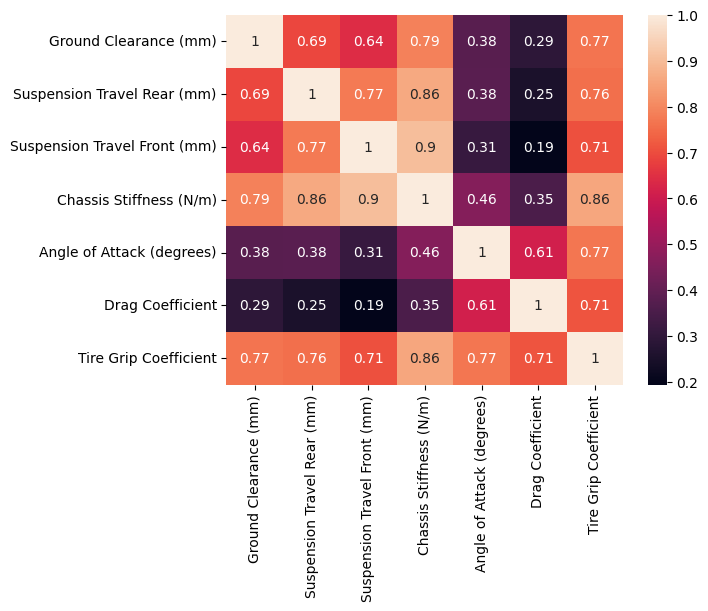

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(),annot=True)
plt.savefig('heatmap.png')

In [59]:
data.corr()

,Ground Clearance (mm),Suspension Travel Rear (mm),Suspension Travel Front (mm),Chassis Stiffness (N/m),Angle of Attack (degrees),Drag Coefficient,Tire Grip Coefficient
Ground Clearance (mm),1.000000,0.691026,0.644094,0.788215,0.377974,0.289543,0.765841
Suspension Travel Rear (mm),0.691026,1.000000,0.773675,0.863596,0.382346,0.254054,0.756533
Suspension Travel Front (mm),0.644094,0.773675,1.000000,0.903905,0.311847,0.194545,0.705175
Chassis Stiffness (N/m),0.788215,0.863596,0.903905,1.000000,0.462539,0.353037,0.856051
Angle of Attack (degrees),0.377974,0.382346,0.311847,0.462539,1.000000,0.612423,0.767255
Drag Coefficient,0.289543,0.254054,0.194545,0.353037,0.612423,1.000000,0.712678
Tire Grip Coefficient,0.765841,0.756533,0.705175,0.856051,0.767255,0.712678,1.000000


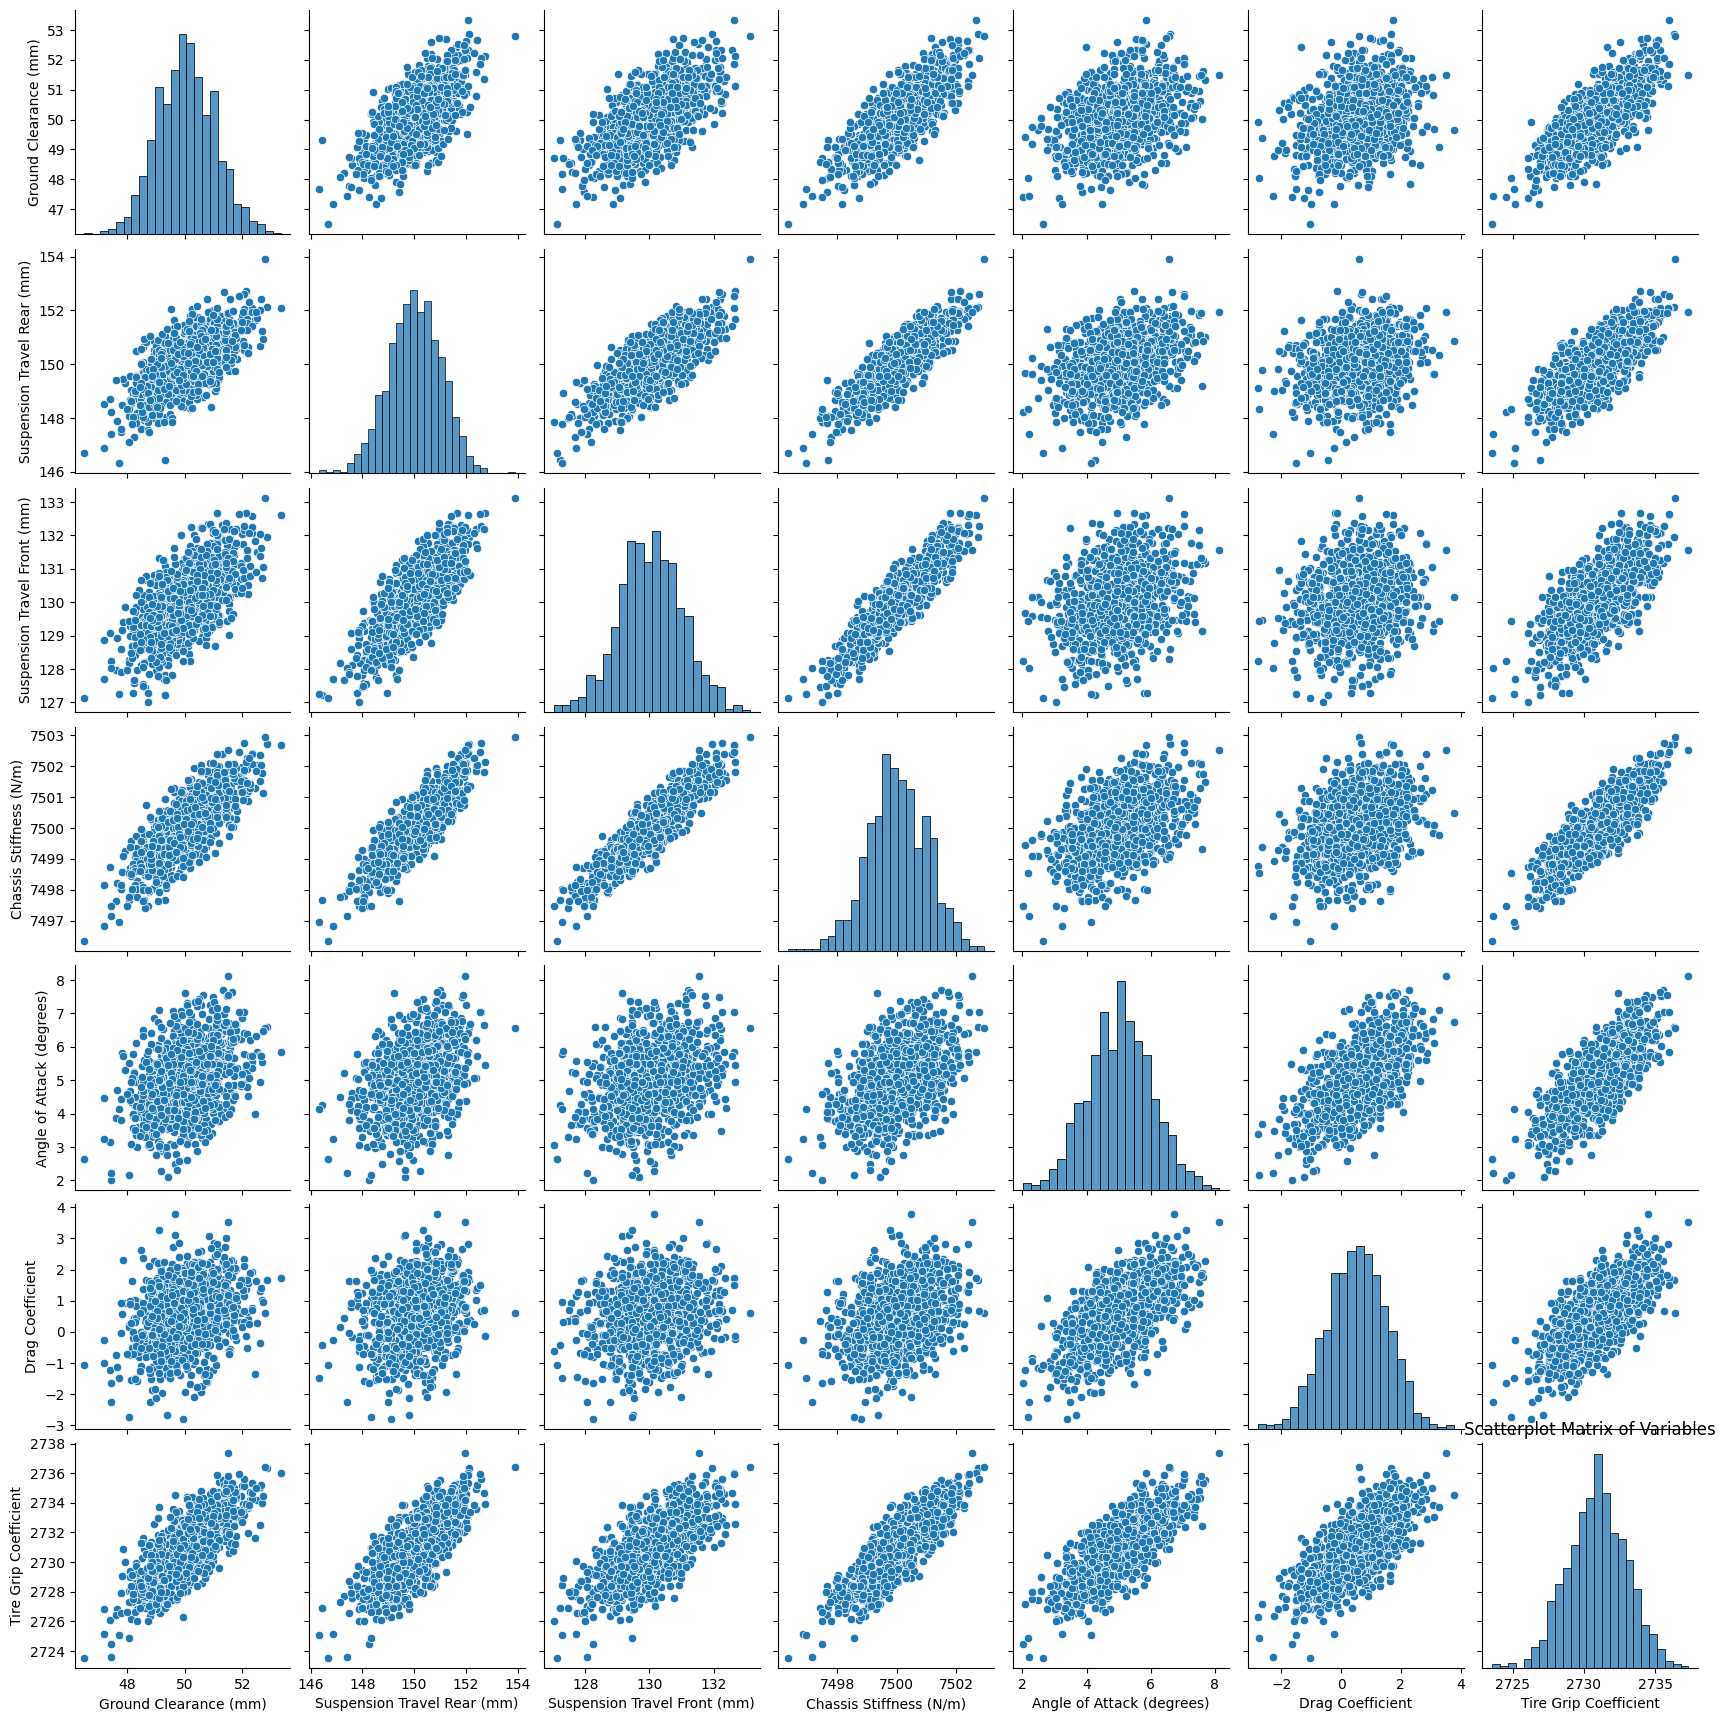

<Figure size 640x480 with 0 Axes>

In [60]:
# Create a scatterplot matrix
sns.pairplot(data, kind='scatter')
plt.title('Scatterplot Matrix of Variables')
plt.show()
plt.savefig('scatter_plot.png', dpi=300)


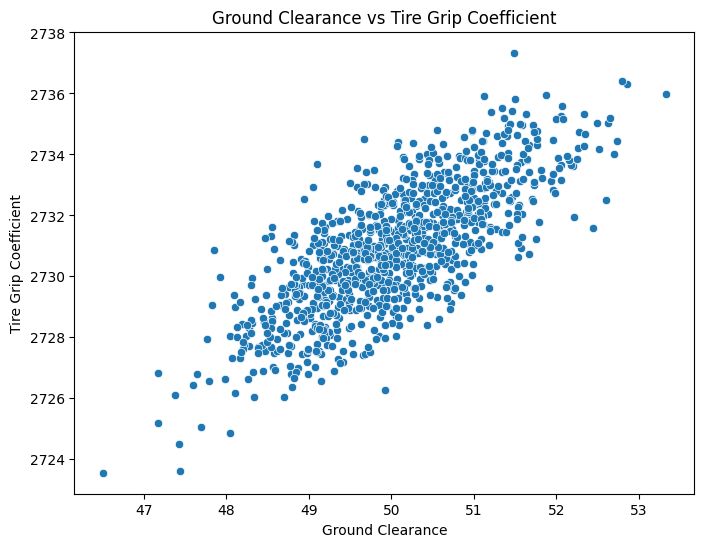

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Ground Clearance (mm)'], y=data['Tire Grip Coefficient'], data=data)
plt.title('Ground Clearance vs Tire Grip Coefficient')
plt.xlabel('Ground Clearance')
plt.ylabel('Tire Grip Coefficient')

# Save the figure with the highest resolution
plt.savefig('scatter_plot.png', dpi=300)  # Set dpi to maximum (300 in this case)

plt.show()

<Figure size 800x600 with 0 Axes>

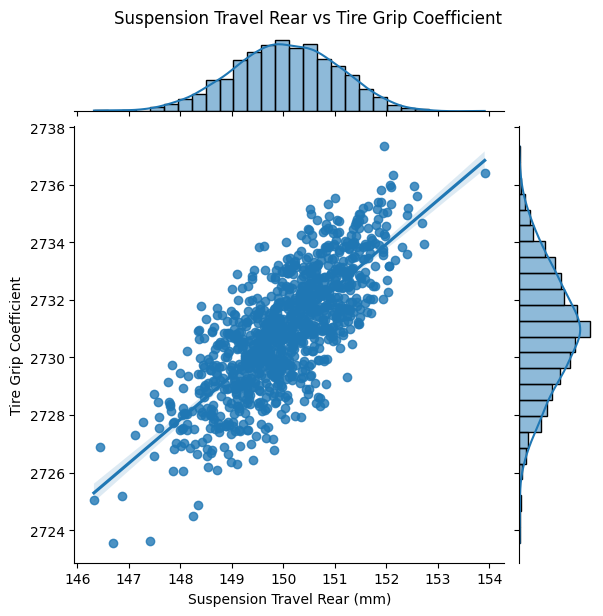

In [62]:
# Joint plot with regression line for Suspension Travel Rear vs Tire Grip Coefficient
plt.figure(figsize=(8, 6))
sns.jointplot(x=data['Suspension Travel Rear (mm)'], y=data['Tire Grip Coefficient'], kind='reg')
plt.suptitle('Suspension Travel Rear vs Tire Grip Coefficient', y=1.02)

# Save the figure with the highest resolution
plt.savefig('suspension_travel_rear_vs_tire_grip_jointplot.png', dpi=300)

plt.show()


In [63]:
from sklearn.metrics import explained_variance_score
X = data[['Ground Clearance (mm)', 'Suspension Travel Rear (mm)', 'Suspension Travel Front (mm)',
          'Chassis Stiffness (N/m)', 'Angle of Attack (degrees)', 'Drag Coefficient']]
y = data['Tire Grip Coefficient']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regression model
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  # Adjust hyperparameters as needed
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate the XGBoost regression model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse = np.sqrt(mse_xgb)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"XGBoost Regression Mean Squared Error: {mse_xgb}")
print(f"XGBoost Regression R-squared Score: {r2_xgb}")

evs = explained_variance_score(y_test, y_pred_xgb)
print(f"Explained Variance Score (EVS): {evs}")

Root Mean Squared Error (RMSE): 0.2526991031424442
XGBoost Regression Mean Squared Error: 0.06385683672899564
XGBoost Regression R-squared Score: 0.9838828534412845
Explained Variance Score (EVS): 0.9839942747213842


In [65]:
adaboost_reg = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Adjust hyperparameters as needed
adaboost_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_reg.predict(X_test)

# Evaluate the AdaBoost regression model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
rmse = np.sqrt(mse_adaboost)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"AdaBoost Regression Mean Squared Error: {mse_adaboost}")
print(f"AdaBoost Regression R-squared Score: {r2_adaboost}")

evs = explained_variance_score(y_test, y_pred_adaboost)
print(f"Explained Variance Score (EVS): {evs}")

Root Mean Squared Error (RMSE): 0.5833748007390381
AdaBoost Regression Mean Squared Error: 0.3403261581373125
AdaBoost Regression R-squared Score: 0.9141033779712261
Explained Variance Score (EVS): 0.9147599026941886


In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SGD regression model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)  # Adjust hyperparameters as needed
sgd_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_sgd = sgd_reg.predict(X_test_scaled)

# Evaluate the SGD regression model
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
rmse = np.sqrt(mse_sgd)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Stochastic Gradient Descent (SGD) Regression Mean Squared Error: {mse_sgd}")
print(f"Stochastic Gradient Descent (SGD) Regression R-squared Score: {r2_sgd}")

evs = explained_variance_score(y_test, y_pred_sgd)
print(f"Explained Variance Score (EVS): {evs}")

Root Mean Squared Error (RMSE): 0.10084443804938377
Stochastic Gradient Descent (SGD) Regression Mean Squared Error: 0.010169600685496001
Stochastic Gradient Descent (SGD) Regression R-squared Score: 0.9974332435947719
Explained Variance Score (EVS): 0.9974435511616961


In [67]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the Random Forest regression model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mse_rf)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Random Forest Regression Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression R-squared Score: {r2_rf}")

evs = explained_variance_score(y_test, y_pred_rf)
print(f"Explained Variance Score (EVS): {evs}")

Root Mean Squared Error (RMSE): 0.3314608852138925
Random Forest Regression Mean Squared Error: 0.1098663184267772
Random Forest Regression R-squared Score: 0.9722702901262437
Explained Variance Score (EVS): 0.9723434874280487


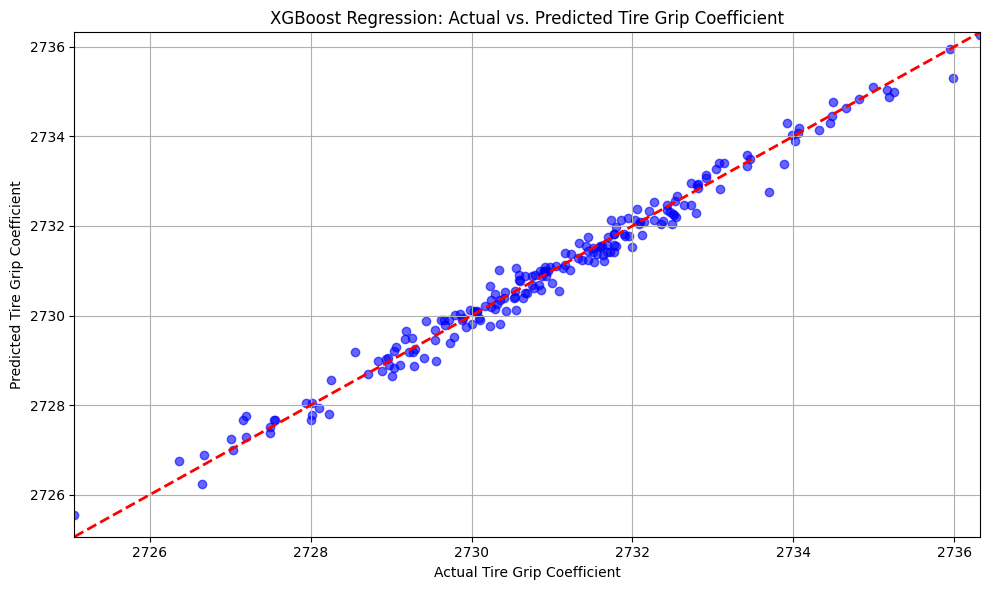

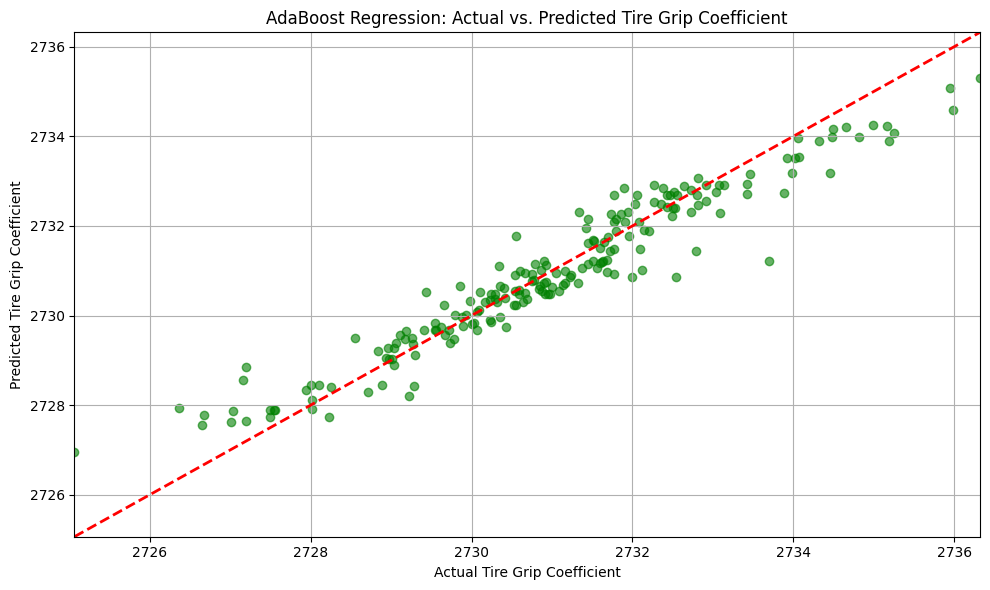

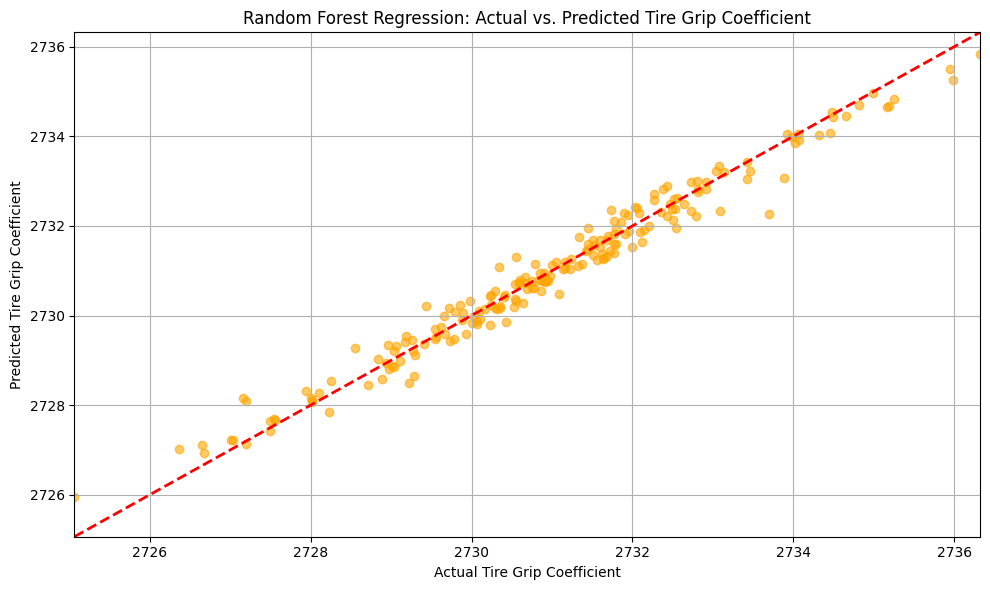

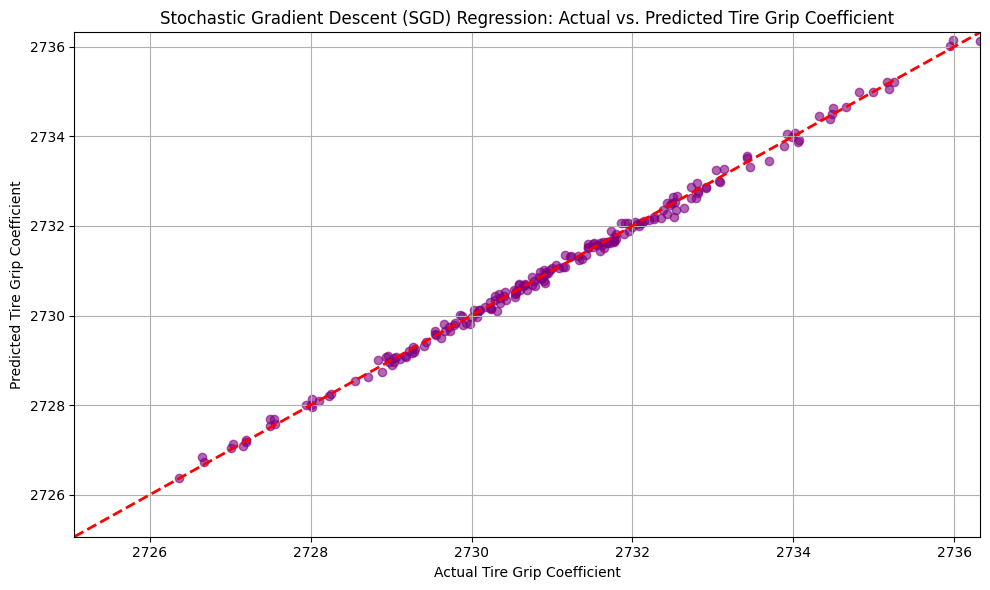

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('XGBoost Regression: Actual vs. Predicted Tire Grip Coefficient')
plt.xlabel('Actual Tire Grip Coefficient')
plt.ylabel('Predicted Tire Grip Coefficient')
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))
plt.grid(True)
plt.tight_layout()
plt.savefig('xgboost_regression_plot.png', dpi=300)
plt.show()

# Plotting AdaBoost Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('AdaBoost Regression: Actual vs. Predicted Tire Grip Coefficient')
plt.xlabel('Actual Tire Grip Coefficient')
plt.ylabel('Predicted Tire Grip Coefficient')
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))
plt.grid(True)
plt.tight_layout()
plt.savefig('adaboost_regression_plot.png', dpi=300)
plt.show()

# Plotting Random Forest Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Random Forest Regression: Actual vs. Predicted Tire Grip Coefficient')
plt.xlabel('Actual Tire Grip Coefficient')
plt.ylabel('Predicted Tire Grip Coefficient')
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))
plt.grid(True)
plt.tight_layout()
plt.savefig('random_forest_regression_plot.png', dpi=300)
plt.show()

# Plotting SGD Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sgd, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Stochastic Gradient Descent (SGD) Regression: Actual vs. Predicted Tire Grip Coefficient')
plt.xlabel('Actual Tire Grip Coefficient')
plt.ylabel('Predicted Tire Grip Coefficient')
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))
plt.grid(True)
plt.tight_layout()
plt.savefig('sgd_regression_plot.png', dpi=300)
plt.show()

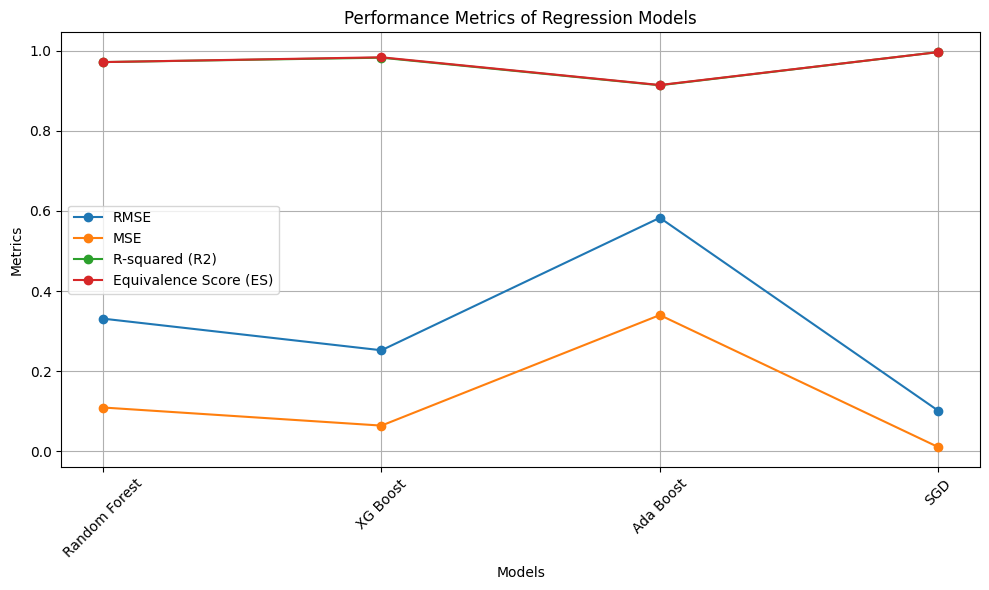

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the models
data = {
    'Model': ['Random Forest', 'XG Boost', 'Ada Boost', 'SGD'],
    'RMSE': [0.331, 0.252, 0.583, 0.101],
    'MSE': [0.109, 0.0638, 0.34, 0.0101],
    'R2': [0.972, 0.983, 0.9141, 0.997],
    'ES': [0.972, 0.984, 0.9147, 0.997]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Model'], df['RMSE'], marker='o', label='RMSE')
plt.plot(df['Model'], df['MSE'], marker='o', label='MSE')
plt.plot(df['Model'], df['R2'], marker='o', label='R-squared (R2)')
plt.plot(df['Model'], df['ES'], marker='o', label='Equivalence Score (ES)')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics of Regression Models')
plt.legend()

# Displaying the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('performance_metrics_line_plot.png')
plt.show()


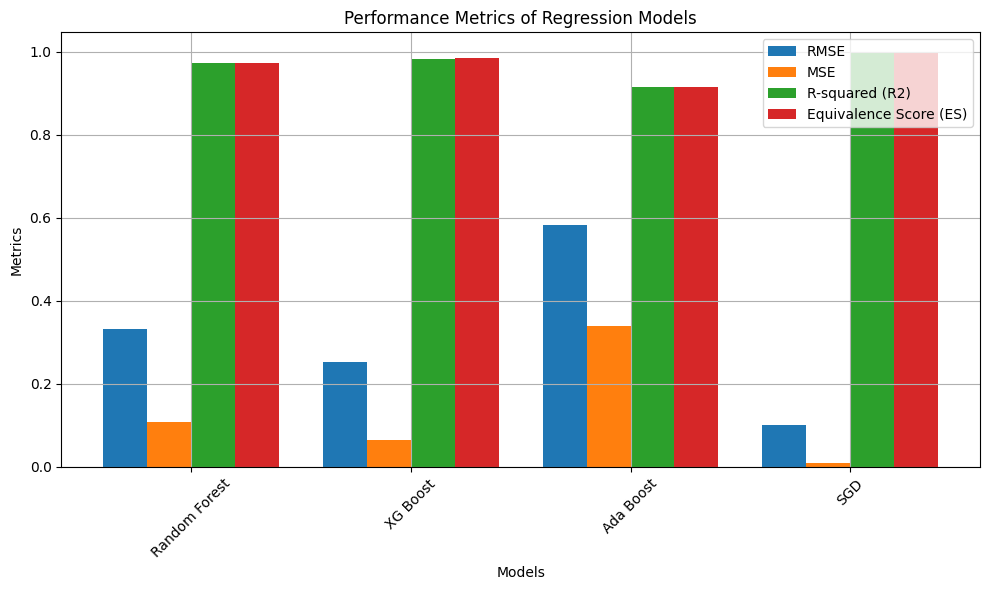

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['Random Forest', 'XG Boost', 'Ada Boost', 'SGD']
rmse = [0.331, 0.252, 0.583, 0.101]
mse = [0.109, 0.0638, 0.34, 0.0101]
r2 = [0.972, 0.983, 0.9141, 0.997]
es = [0.972, 0.984, 0.9147, 0.997]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
rects1 = ax.bar(x - 1.5 * width, rmse, width, label='RMSE')
rects2 = ax.bar(x - 0.5 * width, mse, width, label='MSE')
rects3 = ax.bar(x + 0.5 * width, r2, width, label='R-squared (R2)')
rects4 = ax.bar(x + 1.5 * width, es, width, label='Equivalence Score (ES)')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Metrics')
ax.set_title('Performance Metrics of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding grid and showing plot
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('performance_metrics_plot.png')
plt.show()


In [71]:
scaler = StandardScaler()
sample_input = {
    'Chassis stiffness (N/m)': 7500,
    'Suspension Travel Rear (mm)': 150,
    'Ground Clearance (mm)': 42,
    'Suspension Travel Front (mm)': 130,
    'Angle of Attack (degrees)': 3.45,
    'Drag Coefficient': 0.78
}
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)
# Convert the sample input into a DataFrame

sample_df = pd.DataFrame([sample_input])

scaler = StandardScaler()

sample_scaled = scaler.fit_transform(sample_df)
predicted_tire_grip = sgd_reg.predict(sample_scaled)

# Print the predicted Tire Grip Coefficient
print('Predicted Tire Grip Coefficient:', predicted_tire_grip)

Predicted Tire Grip Coefficient: [2730.91557588]
